In [6]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


In [2]:
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
# Base models
base_models = [
    ('svc', SVC(probability=True, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Final model that learns how to mix base models
blender = LogisticRegression()

# Stacking
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=blender,
    cv=5,       # cross-validation
    n_jobs=-1
)


In [4]:
stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)
print("Stacking Accuracy:", accuracy_score(y_test, y_pred))


Stacking Accuracy: 0.925


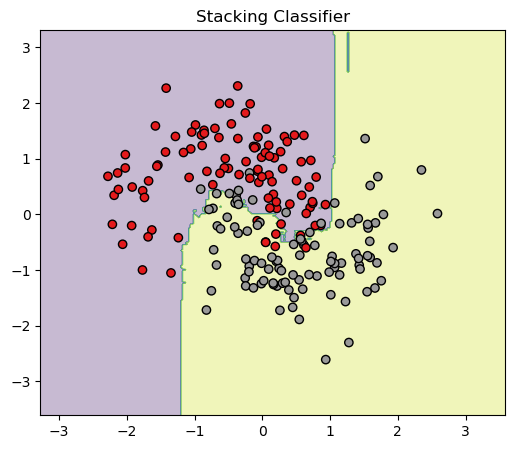

In [7]:
def plot_decision_boundary(clf, X, y, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(X_grid).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
    ax.set_title(title)

fig, ax = plt.subplots(figsize=(6, 5))
plot_decision_boundary(stack_model, X_test, y_test, "Stacking Classifier", ax)
plt.show()
